<a href="https://colab.research.google.com/github/bernhardtandy/ProjectsMLAI/blob/main/HW1_AndyBernhardt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projects in Machine Learning and AI Homework 1**
## *Logistic Regression for Binary Music Genre Classification*
##### **Andy Bernhardt**
##### **bernha@rpi.edu**

---
## **Task 1: Problem Statement**

As an avid musician, I am interested in applications of machine learning and AI in the domain of music, which can include tasks such as music modeling, music authorship attribution, music genre classification, machine listening, and artificial music composition. In this project, we will explore a dataset for the task of *binary music genre classification*, in which the goal is to predict the genre of a song ("classical" or "pop") given features extracted from the audio of the song or other metadata, and use logistic regression to solve this problem. Logistic regression is a suitable model for this task since it is a binary classification problem, where we can use a linear combination of the features and sigmoid activation to predict the probability of an example belonging to a certain class, and subsequently use a threshold to decide the predicted class.


---
## **Task 2: Dataset and Exploratory Data Analysis**

In this section, we will load the required libraries for the project, load and describe the dataset, perform exploratory data analysis on the dataset, and preprocess the dataset for the logistic regression model.

### Setup

In [1]:
# Import required libraries for project
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle

### Load dataset from Google Drive

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Add HW1 folder to path
import sys
sys.path.append('/content/drive/MyDrive/ProjectsMLAI/HW1')

In [4]:
# Load GTZAN 3-second dataset
df = pd.read_csv("/content/drive/MyDrive/ProjectsMLAI/HW1/GTZAN.csv")

### Dataset description
GTZAN is the "most-used public dataset for evaluation in machine listening research for music genre recognition (MGR)". Most notably, it includes a dataset of 30-second audio clips from 100 audio files for 10 genres each, as well as an image for each audio file which is a "visual representation" of the file. In addition, the dataset includes two CSV files: one with features extracted from each 30-second audio file ($\approx$100 examples per genre/10 genres), and a second with features extracted from each audio file split into 3-second clips ($\approx$1000 examples per genre/10 genres). Although the data is from recordings collected in 2000-2001, the dataset is relatively new ($\approx$ two years old).

In this project, we explore the second CSV file of features from 3-second clips, and consider only the data corresponding to the "classical" and "pop" genres (998 examples for "classical" and 1000 examples for "pop" - a balanced dataset) in order to project the general multi-class genre classification task into a binary classification task. We first split the dataset 80/20 into training and test sets, next explore and analyze the training data, and then implement and use logistic regression to train a model to predict the genre given the feature information. This model is finally evaluated on the held-out test set, and compared to models trained using optimized versions of gradient descent provided by machine learning libraries.

Link to dataset: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

### Initial preprocessing
- Show dataset
- Filter rows with labels "classical" and "pop"
- Split dataframe into training (80%) and testing (20%) sets

In [ ]:
# Show dataset
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
# Show original label value counts
print(f"Value counts:\n{df.label.value_counts()}")

Value counts:
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64


In [6]:
# Filter rows with labels "classical" and "pop"
df_filtered = df.loc[df['label'].isin(['classical', 'pop'])]
df_filtered

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1000,classical.00000.0.wav,66149,0.255331,0.080393,0.032510,0.000075,1599.272683,1.856708e+04,1675.591596,20596.851729,...,55.257095,-1.666343,104.916260,4.525014,69.806412,-0.897889,110.099174,4.160629,194.109070,classical
1001,classical.00000.1.wav,66149,0.231431,0.084894,0.031453,0.000059,1551.352817,2.852497e+04,1485.790068,28831.794511,...,50.988071,-1.546098,65.954590,7.157280,69.336983,2.718532,120.725609,-1.692275,150.527496,classical
1002,classical.00000.2.wav,66149,0.225458,0.082233,0.041776,0.000222,1466.237496,4.501883e+04,1495.076539,10600.321072,...,81.254791,-4.686039,102.037117,-4.411082,60.409714,-2.694283,60.788319,3.038420,213.015579,classical
1003,classical.00000.3.wav,66149,0.260866,0.082233,0.032749,0.000136,1435.850575,3.227031e+04,1585.998216,36208.016702,...,40.191471,2.764065,46.115536,-0.732678,60.197281,-8.223904,64.066719,1.734897,119.727020,classical
1004,classical.00000.4.wav,66149,0.269611,0.084948,0.045156,0.000476,1477.712706,2.144815e+04,1569.311614,20844.078511,...,62.712025,-0.079564,89.584717,2.686025,65.182037,-1.290078,105.829987,-4.315813,79.882378,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,pop.00099.5.wav,66149,0.342589,0.089339,0.137082,0.002701,3210.404285,5.229747e+05,3518.891658,106856.507085,...,55.283569,1.613460,56.897308,6.900325,95.293251,-0.688965,37.893326,5.038363,56.635410,pop
7988,pop.00099.6.wav,66149,0.324163,0.096156,0.151230,0.001677,2584.693526,5.699567e+05,3274.529361,135583.646289,...,49.914917,3.775996,73.963264,12.763522,150.864807,7.824332,220.597992,11.147660,241.048462,pop
7989,pop.00099.7.wav,66149,0.347829,0.102577,0.130131,0.002049,2732.619962,9.389428e+05,3305.178275,228680.158389,...,37.255424,0.172578,43.497780,2.358351,79.210114,5.260961,137.600296,9.504729,119.177002,pop
7990,pop.00099.8.wav,66149,0.353859,0.092972,0.148098,0.001058,2891.360207,1.304064e+06,3344.280322,165330.747555,...,57.142181,2.004879,86.238083,4.730950,161.434052,10.439860,157.169983,9.645600,124.777672,pop


In [ ]:
# Show label value counts after filtering
print(f"Value counts:\n{df_filtered.label.value_counts()}")

Value counts:
pop          1000
classical     998
Name: label, dtype: int64


In [7]:
# Split dataframe into training (80%) and testing (20%) sets
df_train, df_test = train_test_split(df_filtered, test_size=0.20, random_state=42)

In [8]:
# Show label distribution of df_train
print(f"Value counts:\n{df_train.label.value_counts()}")

Value counts:
pop          807
classical    791
Name: label, dtype: int64


### Exploratory Data Analysis

In [ ]:
# Show training data
df_train
# The shape of the dataframe is 1598 rows × 60 columns

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1240,classical.00024.0.wav,66149,0.256853,0.081165,0.063861,0.000740,1142.955662,2.647359e+04,1236.730810,29495.775233,...,23.157452,5.066138,36.965843,1.681204,70.539093,-1.076798,85.710426,-3.746837,46.992661,classical
1812,classical.00081.4.wav,66149,0.213500,0.080783,0.022640,0.000039,1568.274304,9.446616e+04,1916.386131,48179.064090,...,25.065315,-3.871517,31.823700,0.547131,140.105667,6.628102,160.751419,12.096710,111.382050,classical
7234,pop.00024.2.wav,66149,0.390747,0.099328,0.183758,0.007104,3179.476009,4.588364e+05,3315.189438,91721.624599,...,134.219284,0.412181,118.702568,6.418019,105.210320,4.481104,74.544273,0.479671,66.002975,pop
7274,pop.00028.2.wav,66149,0.407713,0.081489,0.201328,0.004360,2944.003411,6.796960e+05,3046.243591,176005.675006,...,31.433790,-2.728865,42.046654,-1.113714,81.405228,-0.126810,97.803383,-4.754538,93.379089,pop
7078,pop.00008.6.wav,66149,0.330145,0.085155,0.208710,0.001086,2994.597312,1.372670e+06,2842.078872,142860.079734,...,52.556091,-2.613437,85.774055,-4.759523,50.859188,3.770583,57.107662,0.536194,151.840958,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,pop.00013.2.wav,66149,0.320237,0.094452,0.164515,0.002323,1665.736597,7.413603e+05,2679.886722,223281.754343,...,31.667534,-1.702194,32.547287,0.941928,34.279144,2.281176,32.967426,-2.438581,27.466949,pop
7288,pop.00029.6.wav,66149,0.395751,0.084525,0.231131,0.006728,2947.319225,6.170355e+05,3179.507617,92645.757830,...,37.673748,-2.161001,19.712175,0.801723,27.888802,0.316321,33.338810,-1.239330,36.278149,pop
1860,classical.00086.2.wav,66149,0.323478,0.075820,0.026154,0.000101,1309.244696,4.698571e+04,1406.276048,36040.842437,...,52.534977,-0.599748,27.115049,-0.494780,34.147385,-4.283385,30.886189,-4.320479,38.461967,classical
7453,pop.00046.1.wav,66149,0.454804,0.092619,0.175559,0.009283,2262.535440,1.572448e+06,2705.976480,732397.982012,...,29.512369,-1.203035,72.681183,-1.081250,34.857792,-2.090584,23.201769,-3.219827,36.981171,pop


In [ ]:
# Show column information
df_train.info()
# Most of the features (57) are floating point values, except for filename and length

# Based on additional research, here are some definitions for the features extracted from the audio clips
#
# chroma_stft - chromagram, measuring pitch, generated by short-term Fourier transform
# rms - root mean square, measuring average loudness 
# spectral_centroid - center of mass of spectrum
# spectral_bandwidth - difference between upper and lower frequencies
# rolloff - "frequency under which some percentage (cutoff) of the total energy of the spectrum is contained"
# zero_crossing_rate - "the rate at which a signal transitions from positive to zero to negative or negative to zero to positive"
# harmony - harmonic elements
# perceptr - perceptual weighting of the power spectrogram
# tempo - tempo of the song
# mfcc - mel-frequency cepstral coefficients

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 1240 to 7120
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1598 non-null   object 
 1   length                   1598 non-null   int64  
 2   chroma_stft_mean         1598 non-null   float64
 3   chroma_stft_var          1598 non-null   float64
 4   rms_mean                 1598 non-null   float64
 5   rms_var                  1598 non-null   float64
 6   spectral_centroid_mean   1598 non-null   float64
 7   spectral_centroid_var    1598 non-null   float64
 8   spectral_bandwidth_mean  1598 non-null   float64
 9   spectral_bandwidth_var   1598 non-null   float64
 10  rolloff_mean             1598 non-null   float64
 11  rolloff_var              1598 non-null   float64
 12  zero_crossing_rate_mean  1598 non-null   float64
 13  zero_crossing_rate_var   1598 non-null   float64
 14  harmony_mean         

In [ ]:
# Show dataset statistics for numerical columns
pd.set_option('display.max_columns', None)
df_train.describe()
# The length of each of the 1598 audio clips is the same, so we will not use length as a feature

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1598.0,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,66149.0,0.331418,0.085669,0.121236,3.485420e-03,2208.988703,4.802457e+05,2265.284492,105598.234578,4558.714215,1.577568e+06,0.104305,0.003450,-0.000137,1.324090e-02,-0.000097,7.183259e-03,124.044379,-196.350232,2766.998884,107.557624,571.174675,-5.544157,309.059584,21.481211,162.014435,2.364372,113.468671,4.056082,109.755456,-1.354029,86.502059,1.508871,76.261624,-1.922580,74.012297,3.285040,71.949782,-4.648518,70.229654,0.410756,66.554369,-1.701214,68.585843,-0.380438,65.617608,-0.824016,61.842605,0.233473,59.155399,-0.215869,61.240495,0.683730,64.566489,-0.131958,70.130559,-0.284713,75.552707
std,0.0,0.093425,0.007736,0.095196,4.829931e-03,1015.462626,5.729035e+05,813.151362,104528.337488,2373.180957,1.745193e+06,0.046902,0.005125,0.000989,1.575389e-02,0.000716,9.595788e-03,37.084042,159.617254,2883.045641,47.893842,504.706594,28.086904,273.440171,13.636042,134.520537,12.175359,89.064796,9.317027,92.503656,11.045476,61.362753,9.481894,55.123318,9.265432,50.551238,8.336695,49.406253,6.990558,56.317796,6.630042,53.421119,6.356824,51.000400,6.407894,60.485324,5.668580,54.709140,5.984946,51.792511,5.546933,48.042075,5.813623,49.746625,5.769499,58.640754,5.834914,62.856940
min,66149.0,0.121769,0.038064,0.001061,6.916846e-08,555.235016,1.367307e+03,764.443180,2419.441461,658.336276,3.679120e+03,0.019535,0.000008,-0.007136,8.373646e-07,-0.005578,4.672045e-08,24.377211,-654.772095,32.247700,17.399992,19.262325,-78.371819,14.281029,-35.138493,11.110720,-36.273888,9.754141,-34.889263,8.867343,-36.969501,9.527041,-40.323467,6.899100,-29.084345,9.052539,-29.876465,7.584913,-40.008194,8.188649,-23.759195,9.054798,-28.914648,9.226981,-23.390091,9.025218,-30.467087,7.099493,-26.850016,8.455263,-20.480215,6.960504,-20.733809,7.749363,-27.448456,8.761745,-25.838068,7.539318
25%,66149.0,0.255678,0.081014,0.029025,1.232043e-04,1311.112131,4.046729e+04,1508.616530,27990.005756,2442.444974,1.998947e+05,0.068069,0.000319,-0.000107,8.032298e-04,-0.000184,2.389682e-05,99.384014,-326.176170,1078.040039,65.469557,214.288841,-28.914552,115.390387,12.462438,56.779898,-6.172071,49.241446,-1.689849,40.213772,-10.291774,41.432561,-3.698773,37.332208,-8.693742,37.796324,-1.715205,38.464666,-8.686422,38.209523,-3.651515,35.828362,-5.391359,36.540849,-4.286437,34.107788,-4.202699,32.271821,-3.333702,31.187050,-3.610610,32.110348,-3.087798,33.046350,-3.706646,35.245651,-3.742619,36.966873
50%,66149.0,0.322845,0.084855,0.108342,1.058941e-03,2000.744044,2.184054e+05,2259.093242,78278.622444,4053.708308,9.177079e+05,0.097196,0.001038,-0.000013,7.415006e-03,-0.0

In [ ]:
# Show dataset statistics for categorical columns
df_train.describe(include=['O'])
# The filename contains the genre and is otherwise not very descriptive, so we will not use filename as a feature

,filename,label
count,1598,1598
unique,1598,2
top,classical.00024.0.wav,pop
freq,1,807


In [ ]:
# Show normalized label counts
df_train.label.value_counts(normalize=True)
# The data is balanced

pop          0.505006
classical    0.494994
Name: label, dtype: float64

In [ ]:
# Check for missing values
df_train.isna().sum()
# All of the fields of all of the rows are populated; there are no missing values

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

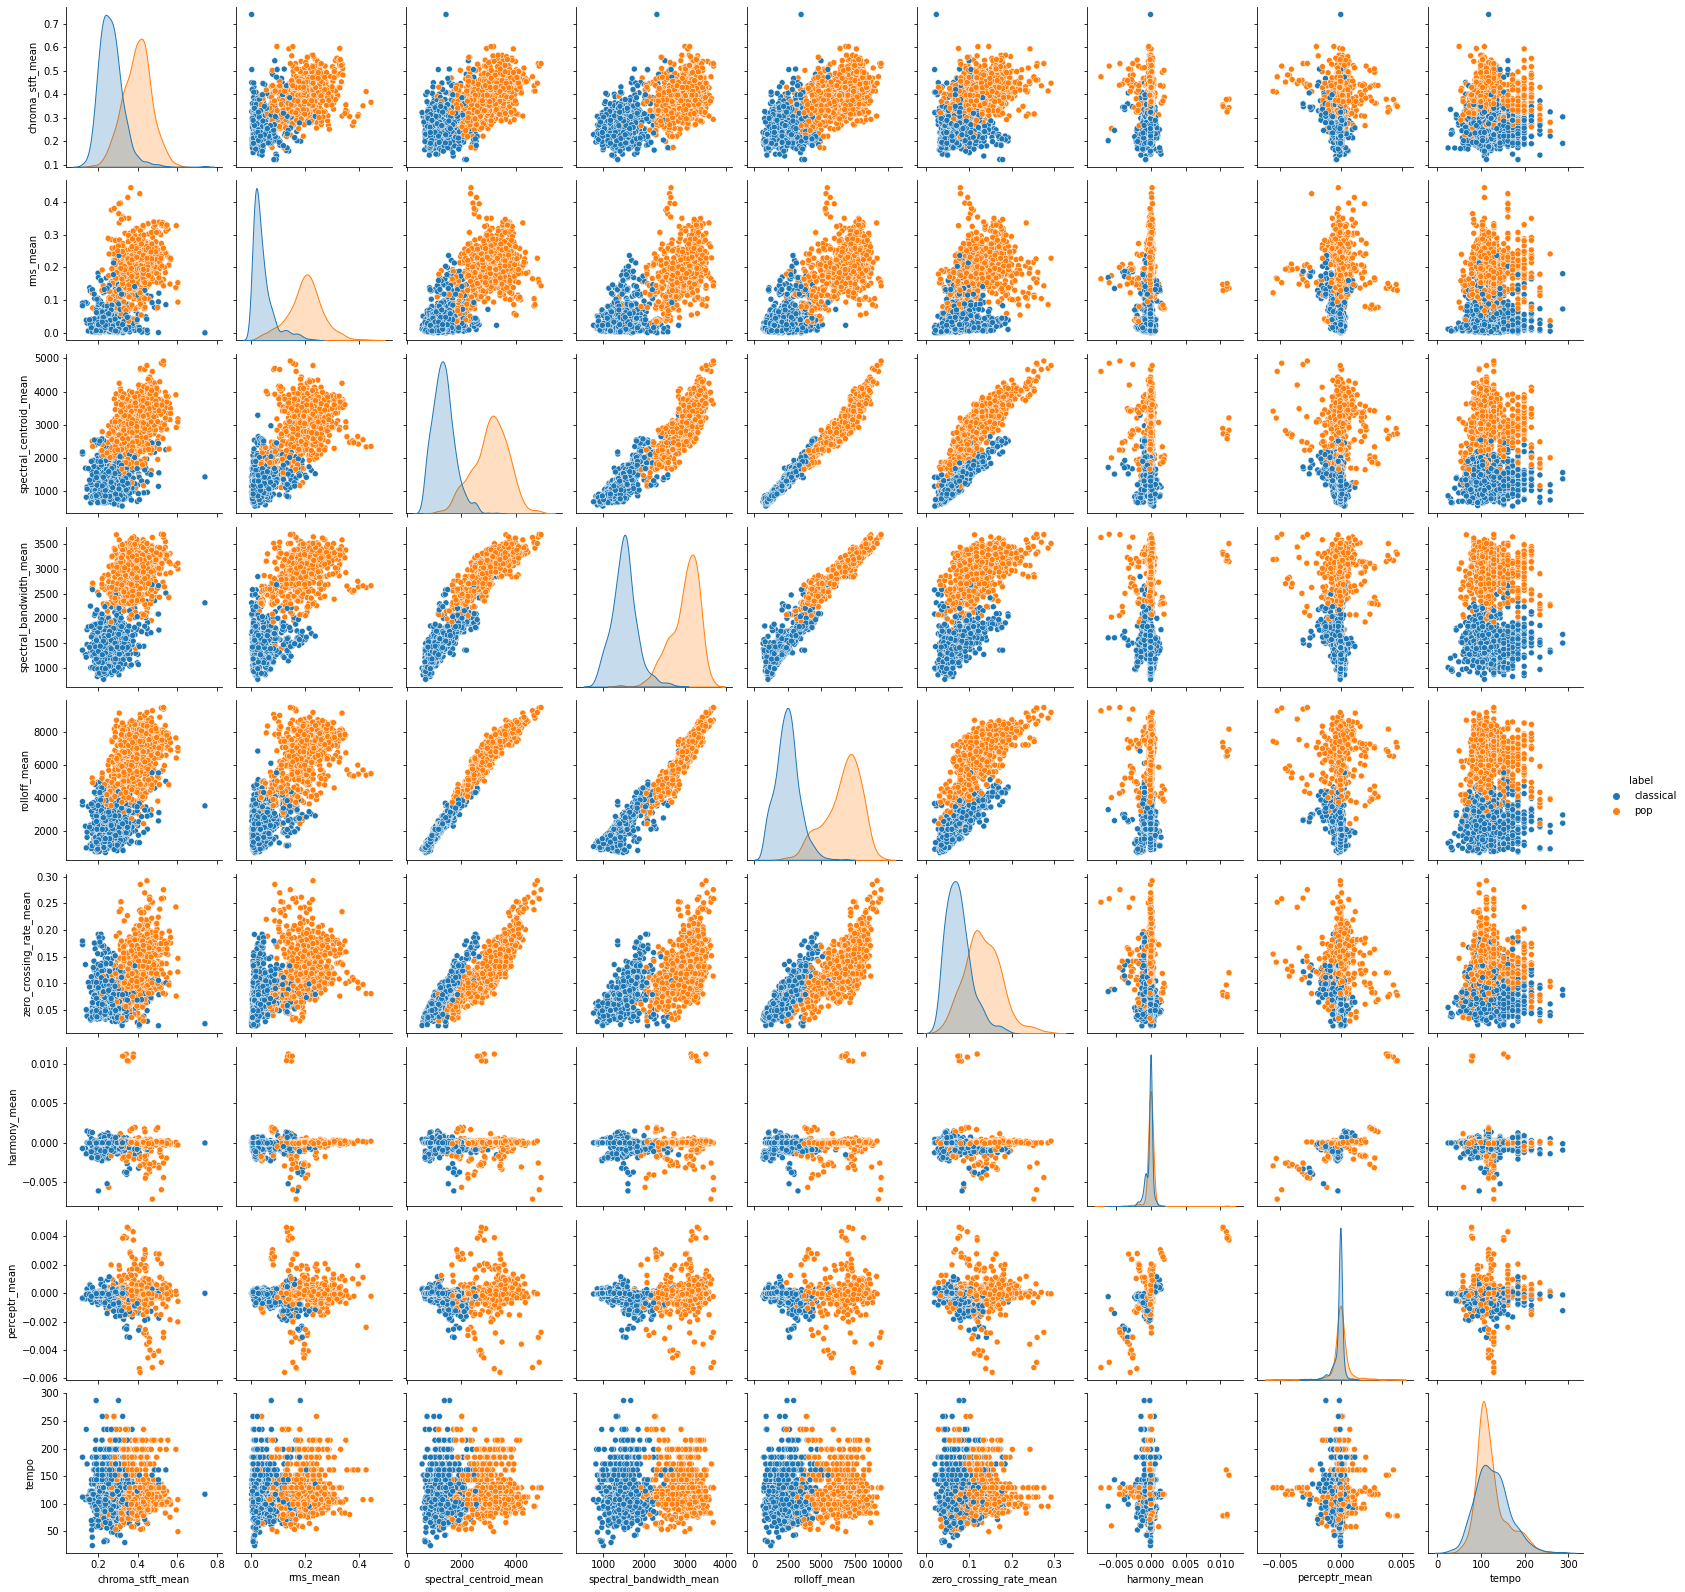

In [ ]:
# Plot pairwise relationships between mean values (excluding mfcc) in the dataset
sns.pairplot(df_train[['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 
                      'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean', 
                      'harmony_mean', 'perceptr_mean', 'tempo', 'label']], hue='label')
# By looking at the distributions along the diagonals, it seems like chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, and zero_crossing_rate
# distinguish well between "classical" and "pop" music. Some of the features seem to have a linear relationship (e.g. spectral_centroid and rolloff), and we can
# investigate pairwise feature correlation further

# Note: we do not produce a pairplot for all 57 features since this would be too large

In [ ]:
# Map labels to 0 ("classical") and 1 ("pop")
df_train.loc[df_train['label'] == 'classical', 'label'] = 0
df_train.loc[df_train['label'] == 'pop', 'label'] = 1
df_train['label'] = pd.to_numeric(df_train['label'])
print(f"Value counts:\n{df_train.label.value_counts()}")

Value counts:
1    807
0    791
Name: label, dtype: int64


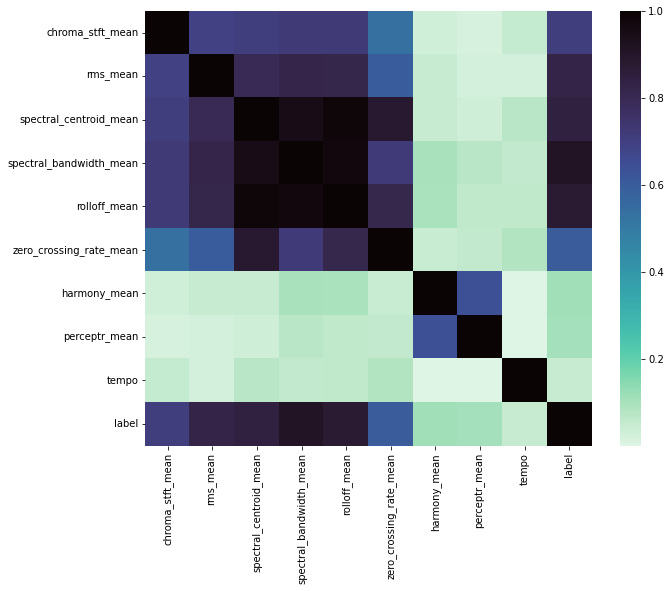

In [ ]:
# Investigate pairwise feature correlation
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_train[['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 
                      'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean', 
                      'harmony_mean', 'perceptr_mean', 'tempo', 'label']].corr().abs(), annot=False, ax=ax, cmap='mako_r')
# Some of our features have relatively strong linear relationships (chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate), (harmony and perceptr)
# Multicollinearity can be a problem for interpreting the coefficients of the learned model, but we can still use the features for prediction
# Some of our features have relatively strong linear relationships with the target label (chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate)

In [ ]:
# Show feature correlations with target variable in decreasing order
df_train.corr()['label'].sort_values(ascending=False)
# Here, we see that many of our features have strong linear relationships with the target variable
# Most of these strong relationships are positive, but mfcc2_mean has a strong negative relationship with the label

label                      1.000000
spectral_bandwidth_mean    0.911514
rolloff_mean               0.876816
spectral_centroid_mean     0.846916
rms_mean                   0.826595
mfcc1_mean                 0.809843
mfcc7_mean                 0.751633
perceptr_var               0.720519
chroma_stft_mean           0.709069
spectral_centroid_var      0.706494
rolloff_var                0.685670
mfcc6_var                  0.657794
mfcc4_var                  0.653495
harmony_var                0.647993
mfcc9_mean                 0.643482
mfcc3_mean                 0.640194
rms_var                    0.634487
mfcc5_mean                 0.625697
zero_crossing_rate_mean    0.604869
zero_crossing_rate_var     0.569926
spectral_bandwidth_var     0.537280
mfcc7_var                  0.508411
mfcc5_var                  0.507050
mfcc3_var                  0.506986
mfcc8_var                  0.392953
mfcc2_var                  0.350063
mfcc11_mean                0.346427
mfcc9_var                  0

### Data preprocessing
- Isolate features (chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, mfcc9_mean, mfcc9_var, mfcc10_mean, mfcc10_var, mfcc11_mean, mfcc11_var, mfcc12_mean, mfcc12_var, mfcc13_mean, mfcc13_var, mfcc14_meanm, fcc14_var, mfcc15_mean, mfcc15_var, mfcc16_mean, mfcc16_var, mfcc17_mean, mfcc17_var, mfcc18_mean, mfcc18_var, mfcc19_mean, mfcc19_var, mfcc20_mean, mfcc20_var)
- Normalize features
- Change labels to 0 ("classical") and 1 ("pop") and isolate labels

In [9]:
# Isolate features
X_train = df_train.drop(['filename', 'length', 'label'], axis=1)
X_test = df_test.drop(['filename', 'length', 'label'], axis=1)
X_train.shape, X_test.shape
# We check that our feature matrices have the correct shape
# For the training data, this is 1598 examples with 57 features each
# For the testing data, this is 400 examples with 57 features each

((1598, 57), (400, 57))

In [10]:
# Normalize features
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [11]:
# Map labels to 0 ("classical") and 1 ("pop")
df_train.loc[df_train['label'] == 'classical', 'label'] = 0
df_train.loc[df_train['label'] == 'pop', 'label'] = 1
df_train['label'] = pd.to_numeric(df_train['label'])

df_test.loc[df_test['label'] == 'classical', 'label'] = 0
df_test.loc[df_test['label'] == 'pop', 'label'] = 1
df_test['label'] = pd.to_numeric(df_test['label'])

In [12]:
# Isolate labels
y_train = df_train.label
y_test = df_test.label
y_train.shape, y_test.shape
# We check that our label vectors have the correct shape

((1598,), (400,))

---
## **Task 3: Implementation of Logistic Regression**

In this section, we will show the logistic regression model, cross-entropy loss function, and derivatives with respect to weights and bias, implement batch gradient descent and mini-batch gradient descent, and evaluate two logistic regression models trained with these optimization algorithms.

### Loss function and derivatives
- Logistic regression model (single input): $\hat{y}^{(i)} = \sigma(\mathbf{w}^Tx^{(i)} + b), \quad \sigma(z) = \frac{1}{1 + e^{-z}}$
- Logistic regression model (N inputs): $\hat{y} = \sigma(X\mathbf{w} + \mathbf{b}), \quad \sigma(\mathbf{z}) = \frac{1}{1 + e^{-\mathbf{z}}}, \quad \mathbf{b} = \begin{bmatrix}b \\ \vdots \\ b\end{bmatrix}$
- Loss (single training example): $l(y^{(i)}, \hat{y}^{(i)}) = -\big(y^{(i)}\log{\hat{y}^{(i)}} - (1 - y^{(i)})\log{(1 - \hat{y}^{(i)})}\big)$
- Loss (set of N training examples): $L(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}l(y^{(i)}, \hat{y}^{(i)})$
- Derivative of $L(y, \hat{y})$ w.r.t $\mathbf{w}$: $\frac{\partial{L}}{\partial{\mathbf{w}}} = \frac{1}{N}X^T(\hat{y} - y)$
- Derivative of $L(y, \hat{y})$ w.r.t $b$: $\frac{\partial{L}}{\partial{b}} = \frac{1}{N}\sum_{i=1}^N(\hat{y}^{(i)} - y^{(i)})$

### Define functions for batch gradient descent, mini-batch gradient descent, and evaluation

In [13]:
# Returns the sigmoid of the input 
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [14]:
# Returns the probability predictions for a set of inputs X given weights w and bias b
def get_yhat(X, w, b):
  return sigmoid(np.matmul(X, w) + b)

In [15]:
# Returns the cross-entropy loss as well as derivatives w.r.t. weights w and bias b for a set of N training examples (X, y)
def get_loss_and_derivatives(X, y, w, b, N):
  yhat = get_yhat(X, w, b)
  loss = -1.0/N * np.sum(y * np.log(yhat) + (1.0 - y) * (np.log(1.0 - yhat)))
  dw = np.matmul(X.T, (yhat - y))/N
  db = np.sum(yhat - y)/N
  return loss, dw, db

In [16]:
# Runs the batch gradient descent optimization algorithm over a training set (X, y) with N examples for num_iterations iterations
# w0, b0 are the initial parameters
# learning_rate is the learning rate, which is fixed
def batch_gradient_descent(X, y, w0, b0, N, learning_rate, num_iterations):
  w = w0
  b = b0
  iter = []
  losses = []
  # Run batch gradient descent iteration
  for i in range(num_iterations):
    loss, dw, db = get_loss_and_derivatives(X, y, w, b, N)
    iter.append(i)
    losses.append(loss)
    w = w - learning_rate * dw
    b = b - learning_rate * db
  return w, b, iter, losses

In [17]:
# Runs the mini-batch gradient descent optimization algorithm over a training set (X, y) with N examples for num_iterations iterations
# w0, b0 are the initial parameters
# learning_rate is the learning rate, which is fixed
# batch_size is the batch size
def minibatch_gradient_descent(X, y, w0, b0, N, learning_rate, num_iterations, batch_size):
  w = w0
  b = b0
  iter = []
  losses = []
  # Determine start and end indices for each batch based on batch_size
  batch_start = []
  batch_end = []
  i = 0
  while i + batch_size < N:
    batch_start.append(i)
    batch_end.append(i + batch_size)
    i = i + batch_size
  batch_start.append(i)
  batch_end.append(N)
  # Run mini-batch gradient descent iteration
  for i in range(num_iterations):
    X, y = shuffle(X, y)
    j = 0
    for start, end in zip(batch_start, batch_end):
      X_batch = X[start:end]
      y_batch = y[start:end]
      loss, dw, db = get_loss_and_derivatives(X_batch, y_batch, w, b, batch_size)
      iter.append(i * len(batch_start) + j)
      losses.append(loss)
      w = w - learning_rate * dw
      b = b - learning_rate * db
      j += 1
  return w, b, iter, losses

In [18]:
# Returns accuracy score and F1-score metrics for a logistic regression model parameterized by weights w and bias b over a dataset (X, y)
def evaluate(X, y, w, b):
  yhat = get_yhat(X, w, b)
  pred = np.array([1.0 if value >= 0.5 else 0.0 for value in yhat])
  acc = accuracy_score(y, pred)
  f1 = f1_score(y, pred)
  return acc, f1

### Train logistic regression model using batch gradient descent and evaluate

In [ ]:
# Initialize weights and bias to random values
w0 = np.random.rand(57,)
b0 = np.random.rand(1)

In [ ]:
# Check training set accuracy and F1 score before training
acc_train, f1_train = evaluate(X_train, y_train, w0, b0)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.5050062578222778
Training set F1-score: 0.671101871101871


In [ ]:
# Run batch gradient descent with learning rate of 0.2 and 50000 iterations
learning_rate = 0.2
num_iterations = 50000
w, b, iter, losses = batch_gradient_descent(X_train, y_train, w0, b0, len(y_train), learning_rate, num_iterations)

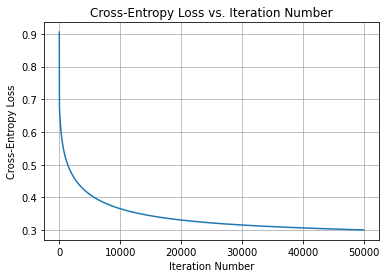

In [ ]:
# Visualize loss vs. iteration number
sns.lineplot(x = iter, y = losses)
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [ ]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, w, b)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.8717146433041302
Training set F1-score: 0.8780487804878048


In [ ]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, w, b)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.8675
Test set F1-score: 0.8697788697788699


### Train logistic regression model using batch gradient descent and evaluate (500 iterations)

In [19]:
# Initialize weights and bias to random values
w0 = np.random.rand(57,)
b0 = np.random.rand(1)

In [20]:
# Check training set accuracy and F1 score before training
acc_train, f1_train = evaluate(X_train, y_train, w0, b0)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.5050062578222778
Training set F1-score: 0.671101871101871


In [21]:
# Run batch gradient descent with learning rate of 0.2 and 500 iterations
learning_rate = 0.2
num_iterations = 500
w, b, iter, losses = batch_gradient_descent(X_train, y_train, w0, b0, len(y_train), learning_rate, num_iterations)

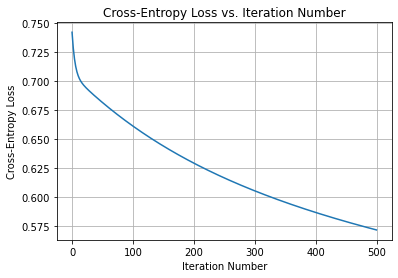

In [22]:
# Visualize loss vs. iteration number
sns.lineplot(x = iter, y = losses)
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [23]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, w, b)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.769712140175219
Training set F1-score: 0.771712158808933


In [24]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, w, b)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.7875
Test set F1-score: 0.7826086956521741


### Train logistic regression model using mini-batch gradient descent and evaluate

In [ ]:
# Initialize weights and bias to random values
w0 = np.random.rand(57,)
b0 = np.random.rand(1)

In [ ]:
# Check training set accuracy and F1 score before training
acc_train, f1_train = evaluate(X_train, y_train, w0, b0)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.5050062578222778
Training set F1-score: 0.671101871101871


In [ ]:
# Run mini-batch gradient descent with learning rate of 0.2 and 1500 iterations
learning_rate = 0.2
num_iterations = 1500
w, b, iter, losses = minibatch_gradient_descent(X_train, y_train, w0, b0, len(y_train), learning_rate, num_iterations, 50)

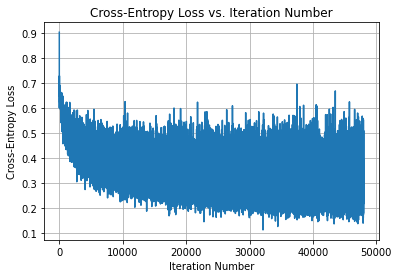

In [ ]:
# Visualize loss vs. iteration number
sns.lineplot(x = iter, y = losses)
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [ ]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, w, b)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.8717146433041302
Training set F1-score: 0.8779035139964264


In [ ]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, w, b)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.8675
Test set F1-score: 0.8697788697788699


### Train logistic regression model using mini-batch gradient descent and evaluate (500 iterations)

In [25]:
# Initialize weights and bias to random values
w0 = np.random.rand(57,)
b0 = np.random.rand(1)

In [26]:
# Check training set accuracy and F1 score before training
acc_train, f1_train = evaluate(X_train, y_train, w0, b0)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.5050062578222778
Training set F1-score: 0.671101871101871


In [27]:
# Run mini-batch gradient descent with learning rate of 0.2 and 500 iterations
learning_rate = 0.2
num_iterations = 500
w, b, iter, losses = minibatch_gradient_descent(X_train, y_train, w0, b0, len(y_train), learning_rate, num_iterations, 50)

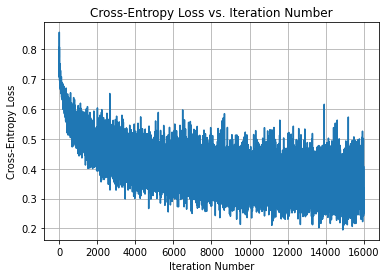

In [28]:
# Visualize loss vs. iteration number
sns.lineplot(x = iter, y = losses)
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [29]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, w, b)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.8610763454317898
Training set F1-score: 0.8687943262411347


In [30]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, w, b)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.865
Test set F1-score: 0.8682926829268293


---
## **Task 4: Comparison of Optimized Gradient Descent Algorithms**

In this section, we will use tensorflow and keras to implement logistic regression models, and evaluate two models trained with the Adam and RMSprop optimization algorithms.

### Install requirements

In [ ]:
# Install keras
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Define, fit, and evaluate a logistic regression model using the Adam optimizer

In [ ]:
# Define a logistic regression model for this task using keras and compile the model with the Adam optimizer
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_dim=57))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 58        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model over 500 iterations
history = model.fit(X_train, y_train, epochs=500, verbose=0)

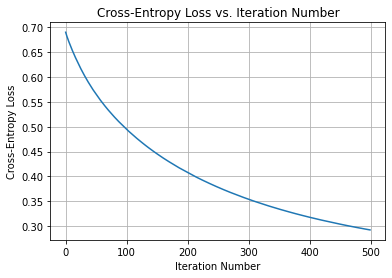

In [ ]:
# Plot Cross-Entropy Loss vs. Iteration Number
plt.plot(history.history['loss'])
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [ ]:
# Get weights and bias from model
weights = model.layers[0].get_weights()[0]
bias  = model.layers[0].get_weights()[1]
weights.shape, bias.shape

((57, 1), (1,))

In [ ]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, weights, bias)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.9011264080100125
Training set F1-score: 0.9053892215568862


In [ ]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, weights, bias)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.875
Test set F1-score: 0.8780487804878049


### Define, fit, and evaluate a logistic regression model using the RMSprop optimizer

In [ ]:
# Define a logistic regression model for this task using keras and compile the model with the RMSprop optimizer
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_dim=57))
model.compile(optimizer='RMSprop', loss='binary_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 58        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model over 500 iterations
history = model.fit(X_train, y_train, epochs=500, verbose=0)

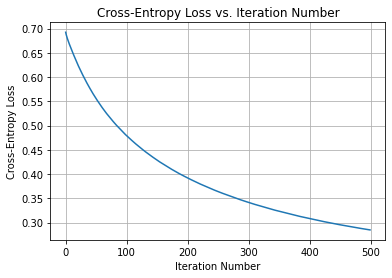

In [ ]:
# Plot Cross-Entropy Loss vs. Iteration Number
plt.plot(history.history['loss'])
plt.xlabel("Iteration Number")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Iteration Number")
plt.grid()

In [ ]:
# Get weights and bias from model
weights = model.layers[0].get_weights()[0]
bias  = model.layers[0].get_weights()[1]
weights.shape, bias.shape

((57, 1), (1,))

In [ ]:
# Check training set accuracy and F1 score
acc_train, f1_train = evaluate(X_train, y_train, weights, bias)
print(f"Training set accuracy: {acc_train}\nTraining set F1-score: {f1_train}")

Training set accuracy: 0.9030037546933667
Training set F1-score: 0.9073520621637777


In [ ]:
# Evaluate model on test set
acc_test, f1_test = evaluate(X_test, y_test, weights, bias)
print(f"Test set accuracy: {acc_test}\nTest set F1-score: {f1_test}")

Test set accuracy: 0.88
Test set F1-score: 0.883495145631068


### Conclusion

| Optimization Algorithm | Number of Iterations | Test Set Accuracy | Test Set F1-score
|:---:|:---:|:---:|:---:|
|Batch Gradient Descent|50000|0.8675|0.8698|
|Mini-batch Gradient Descent|15000|0.8675|0.8698|
|Batch Gradient Descent|500|0.7875|0.7826|
|Mini-batch Gradient Descent|500|0.8650|0.8682|
|Adam|500|0.8750|0.8780|
|RMSprop|500|**0.8800**|**0.8835**|

Initially, we see that, given enough iterations through the training data, all four optimization approaches produce a logistic regression model which performs relatively well on the binary music genre classification task. This makes sense, since the binary cross-entropy loss function is convex, and all of the algorithms are guaranteed to converge to the global minimum for convex functions. However, keeping the number of iterations through the training data constant and small (500), we see that Adam and RMSprop produce models scoring the highest on accuracy and F1-score metrics, with mini-batch gradient descent not far behind - but far better than batch gradient descent. By using information from past gradients, Adam and RMSprop accelerate the learning process, as shown by our results. This shows that the optimized algorithms converge to smaller loss values faster, or, in other words, achieve better parameters faster, which can prove highly beneficial in the training of models on large datasets in which computational cost of training is a concern. For this particular music genre binary classification task with a logistic regression model, the dataset is relatively small and the number of trained parameters not large (58), and so the optimized algorithms are not necessary in order to have fast convergence. As a result, we would not need to use the optimized algorithms. However, since they *can* be used and are certainly improvements over vanilla gradient descent, we can utilize them to our advantage — in this task and many others. 